In [3]:
!unzip mnist.zip

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: mnist/train/5/2413.png  
  inflating: mnist/train/5/2445.png  
  inflating: mnist/train/5/2452.png  
  inflating: mnist/train/5/2460.png  
  inflating: mnist/train/5/2476.png  
  inflating: mnist/train/5/2487.png  
  inflating: mnist/train/5/2515.png  
  inflating: mnist/train/5/2518.png  
  inflating: mnist/train/5/2525.png  
  inflating: mnist/train/5/2526.png  
  inflating: mnist/train/5/2540.png  
  inflating: mnist/train/5/2545.png  
  inflating: mnist/train/5/2546.png  
  inflating: mnist/train/5/2554.png  
  inflating: mnist/train/5/2556.png  
  inflating: mnist/train/5/2558.png  
  inflating: mnist/train/5/2559.png  
  inflating: mnist/train/5/2569.png  
  inflating: mnist/train/5/2573.png  
  inflating: mnist/train/5/2574.png  
  inflating: mnist/train/5/2581.png  
  inflating: mnist/train/5/2586.png  
  inflating: mnist/train/5/2597.png  
  inflating: mnist/train/5/2604.png  
  inflating: mnist/tr

In [4]:
from glob import glob

train_files = glob('./mnist/train/*/*.png')
valid_files = glob('./mnist/valid/*/*.png')
test_files = glob('./mnist/test/*/*.png')

train_files[0]

'./mnist/train/0/3565.png'

In [5]:
import numpy as np

np.random.shuffle(train_files)
np.random.shuffle(valid_files)
np.random.shuffle(test_files)

len(train_files), len(valid_files), len(test_files)

(6000, 2000, 992)

In [6]:
from PIL import Image

N_train = len(train_files)
X_train = []
Y_train = []

for i, train_file in enumerate(train_files):
  Y_train.append( int(train_file.split('/')[3]) )
  X_train.append(np.array(Image.open(train_file)))

In [7]:
N_valid = len(valid_files)
X_valid = []
Y_valid = []

for i, valid_file in enumerate(valid_files):
  Y_valid.append( int(valid_file.split('/')[3]) )
  X_valid.append( np.array(Image.open(valid_file)) )

In [30]:
N_test = len(test_files)
X_test = []
Y_test = []

for i, test_file in enumerate(test_files):
  Y_test.append( int(test_file.split('/')[3]) )
  X_test.append( np.array(Image.open(test_file)) )

len(X_test)

992

In [9]:
import random
X_trainlala10=[]
X_trainlala20=[]
X_trainlala50=[]
X_trainlala80=[]
X_train10=[]
X_train20=[]
X_train50=[]
X_train80=[]
Y_train10=[]
Y_train20=[]
Y_train50=[]
Y_train80=[]
for i in range(600):
  X_trainlala10.append(random.randrange(1, 6000, 1))
for i in range(1200):
  X_trainlala20.append(random.randrange(1, 6000, 1))
for i in range(3000):
  X_trainlala50.append(random.randrange(1, 6000, 1))
for i in range(4800):
  X_trainlala80.append(random.randrange(1, 6000, 1))

for i in range(len(X_trainlala10)):
  X_train10.append(X_train[i])
  Y_train10.append(Y_train[i])
for i in range(len(X_trainlala20)):
  X_train20.append(X_train[i])
  Y_train20.append(Y_train[i])
for i in range(len(X_trainlala50)):
  X_train50.append(X_train[i])
  Y_train50.append(Y_train[i])
for i in range(len(X_trainlala80)):
  X_train80.append(X_train[i])
  Y_train80.append(Y_train[i])

len(X_train10),len(X_train20),len(X_train50),len(X_train80)

(600, 1200, 3000, 4800)

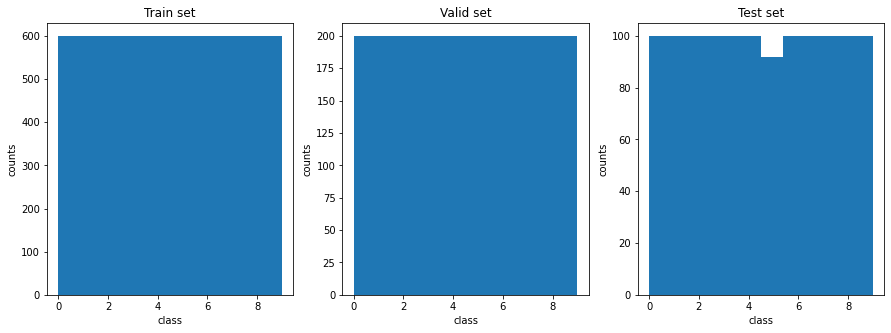

In [10]:
from PIL import Image
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(np.sort(Y_train))
plt.xlabel('class')
plt.ylabel('counts')
plt.title('Train set')

plt.subplot(1,3,2)
plt.hist(np.sort(Y_valid))
plt.xlabel('class')
plt.ylabel('counts')
plt.title('Valid set')

plt.subplot(1,3,3)
plt.hist(np.sort(Y_test))
plt.xlabel('class')
plt.ylabel('counts')
plt.title('Test set')

plt.show()

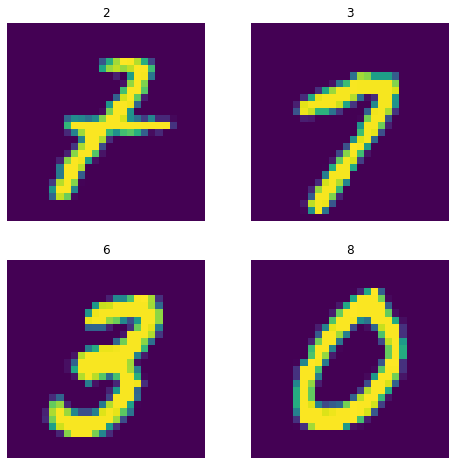

In [11]:
fig = plt.figure(figsize=(8,8))
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.imshow(X_train[i*15])
  plt.title(Y_test[i*15])
  plt.axis(False)
plt.show()

In [36]:
import torch
from torch.autograd import Variable

X_train = Variable(torch.from_numpy(np.array(X_train))).float()
Y_train = Variable(torch.from_numpy(np.array(Y_train))).long()

X_valid = Variable(torch.from_numpy(np.array(X_valid))).float()
Y_valid = Variable(torch.from_numpy(np.array(Y_valid))).long()

X_test = Variable(torch.from_numpy(np.array(X_test))).float()
Y_test = Variable(torch.from_numpy(np.array(Y_test))).long()

X_train.data.size()

torch.Size([6000, 28, 28])

In [13]:
input_dim = 28*28
out_dim = 10
hidden = 50

model = torch.nn.Sequential(
  torch.nn.Linear(input_dim, hidden),
  torch.nn.ReLU(),       
  torch.nn.Linear(hidden, hidden),
  torch.nn.ReLU(),
  torch.nn.Linear(hidden, out_dim)
)

optimizer = torch.optim.Adam(model.parameters())
criterion = torch.nn.CrossEntropyLoss()

In [14]:
from sklearn.metrics import f1_score # Nueva métrica (La revisaremos la próóxima sesión)

#-- Número de épocas
n_epoch = 100

#-- Listas de evaluación entrenamiento
loss_train = []
f1_train = []
acc_train = []

#-- Listas de evaluación validación
loss_valid = []
f1_valid = []
acc_valid = []

#-- Entrenamineto de la ANN
for epoch in range(n_epoch):
  model.train()
  
  Xtr = X_train.view(X_train.size(0), -1)
  Y_pred = model(Xtr)

  loss = criterion(Y_pred,Y_train)
  loss_train.append(loss.item())

  Y_pred = torch.argmax(Y_pred, 1)
  f1_train.append( f1_score(Y_train,Y_pred, average='macro') )
  
  acc = sum(Y_train == Y_pred)/len(Y_pred)
  acc_train.append(acc)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  print( 'Epoch [{}/{}], loss: {}. f1:{} acc: {} '.format(epoch+1,n_epoch,loss_train[-1], f1_train[-1], acc_train[-1]) )

  model.eval()
  Xvl = X_valid.view(X_valid.size(0), -1)
  Y_pred = model(Xvl)  
  loss = criterion(Y_pred,Y_valid)
  loss_valid.append(loss.item())

  Y_pred = torch.argmax(Y_pred, 1)
  f1_valid.append( f1_score(Y_valid, Y_pred, average='macro') )

  acc = sum(Y_valid == Y_pred)/len(Y_pred)
  acc_valid.append(acc)

Epoch [1/100], loss: 12.538421630859375. f1:0.03519871638690984 acc: 0.08900000154972076 
Epoch [2/100], loss: 9.227758407592773. f1:0.07965742988033153 acc: 0.13083332777023315 
Epoch [3/100], loss: 6.241063594818115. f1:0.12735597587099803 acc: 0.16433332860469818 
Epoch [4/100], loss: 4.447987079620361. f1:0.19719073943781013 acc: 0.2213333398103714 
Epoch [5/100], loss: 3.257097005844116. f1:0.30397961565267095 acc: 0.3188333213329315 
Epoch [6/100], loss: 2.629456043243408. f1:0.3848309657887536 acc: 0.40583333373069763 
Epoch [7/100], loss: 2.3353312015533447. f1:0.42917006989130674 acc: 0.4501666724681854 
Epoch [8/100], loss: 2.0679187774658203. f1:0.4681053745253574 acc: 0.48350000381469727 
Epoch [9/100], loss: 1.831491231918335. f1:0.5096649855828653 acc: 0.5201666951179504 
Epoch [10/100], loss: 1.6848043203353882. f1:0.5422978686641499 acc: 0.5529999732971191 
Epoch [11/100], loss: 1.6014599800109863. f1:0.5633822659483049 acc: 0.5761666893959045 
Epoch [12/100], loss: 1.5

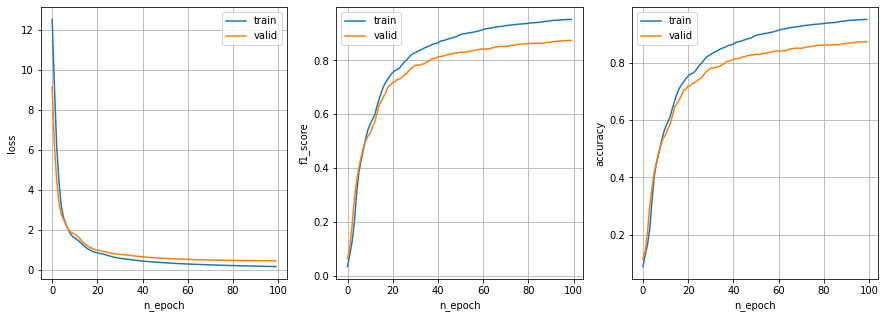

In [15]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(range(n_epoch), loss_train, label='train')
plt.plot(range(n_epoch), loss_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.subplot(1,3,2)
plt.plot(range(n_epoch), f1_train, label='train')
plt.plot(range(n_epoch), f1_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('f1_score')
plt.legend()
plt.grid()
plt.subplot(1,3,3)
plt.plot(range(n_epoch), acc_train, label='train')
plt.plot(range(n_epoch), acc_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid()

plt.savefig('./curves_ok.png', bbox_inches='tight')
plt.show()

In [16]:
X_train10 = Variable(torch.from_numpy(np.array(X_train10))).float()
Y_train10 = Variable(torch.from_numpy(np.array(Y_train10))).long()
X_train20 = Variable(torch.from_numpy(np.array(X_train20))).float()
Y_train20 = Variable(torch.from_numpy(np.array(Y_train20))).long()
X_train50 = Variable(torch.from_numpy(np.array(X_train50))).float()
Y_train50 = Variable(torch.from_numpy(np.array(Y_train50))).long()
X_train80 = Variable(torch.from_numpy(np.array(X_train80))).float()
Y_train80 = Variable(torch.from_numpy(np.array(Y_train80))).long()

In [17]:
input_dim = 28*28
out_dim = 10
hidden = 50

model = torch.nn.Sequential(
  torch.nn.Linear(input_dim, hidden),
  torch.nn.ReLU(),       
  torch.nn.Linear(hidden, hidden),
  torch.nn.ReLU(),
  torch.nn.Linear(hidden, out_dim)
)

optimizer = torch.optim.Adam(model.parameters())
criterion = torch.nn.CrossEntropyLoss()

In [18]:
#-- Número de épocas
n_epoch = 100

#-- Listas de evaluación entrenamiento
loss_train = []
f1_train = []
acc_train = []

#-- Listas de evaluación validación
loss_valid = []
f1_valid = []
acc_valid = []

#-- Entrenamineto de la ANN
for epoch in range(n_epoch):
  model.train()
  
  Xtr = X_train10.view(X_train10.size(0), -1)
  Y_pred = model(Xtr)

  loss = criterion(Y_pred,Y_train10)
  loss_train.append(loss.item())

  Y_pred = torch.argmax(Y_pred, 1)
  f1_train.append( f1_score(Y_train10,Y_pred, average='macro') )
  
  acc = sum(Y_train10 == Y_pred)/len(Y_pred)
  acc_train.append(acc)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  print( 'Epoch [{}/{}], loss: {}. f1:{} acc: {} '.format(epoch+1,n_epoch,loss_train[-1], f1_train[-1], acc_train[-1]) )

  model.eval()
  Xvl = X_valid.view(X_valid.size(0), -1)
  Y_pred = model(Xvl)  
  loss = criterion(Y_pred,Y_valid)
  loss_valid.append(loss.item())

  Y_pred = torch.argmax(Y_pred, 1)
  f1_valid.append( f1_score(Y_valid, Y_pred, average='macro') )

  acc = sum(Y_valid == Y_pred)/len(Y_pred)
  acc_valid.append(acc)

Epoch [1/100], loss: 13.98453140258789. f1:0.028094468027760933 acc: 0.07833333313465118 
Epoch [2/100], loss: 7.481507301330566. f1:0.0890418358376538 acc: 0.10833333432674408 
Epoch [3/100], loss: 4.778416633605957. f1:0.21117879644317133 acc: 0.24166665971279144 
Epoch [4/100], loss: 3.419495105743408. f1:0.27537364391498187 acc: 0.3199999928474426 
Epoch [5/100], loss: 2.641944408416748. f1:0.347864837161108 acc: 0.3933333456516266 
Epoch [6/100], loss: 2.2530643939971924. f1:0.40203567493597925 acc: 0.43666666746139526 
Epoch [7/100], loss: 1.9347896575927734. f1:0.46538366106947693 acc: 0.49000000953674316 
Epoch [8/100], loss: 1.648307204246521. f1:0.543132548920029 acc: 0.5533333420753479 
Epoch [9/100], loss: 1.4259605407714844. f1:0.5934025188827088 acc: 0.6016666889190674 
Epoch [10/100], loss: 1.265866994857788. f1:0.6306170637026576 acc: 0.6399999856948853 
Epoch [11/100], loss: 1.1200900077819824. f1:0.65135794299306 acc: 0.6600000262260437 
Epoch [12/100], loss: 0.971060

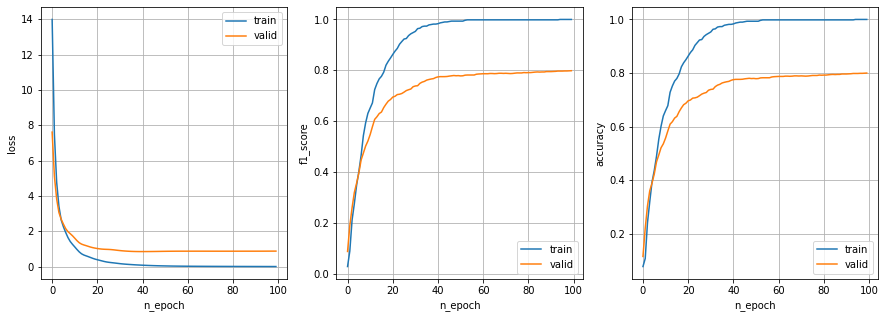

In [19]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(range(n_epoch), loss_train, label='train')
plt.plot(range(n_epoch), loss_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.subplot(1,3,2)
plt.plot(range(n_epoch), f1_train, label='train')
plt.plot(range(n_epoch), f1_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('f1_score')
plt.legend()
plt.grid()
plt.subplot(1,3,3)
plt.plot(range(n_epoch), acc_train, label='train')
plt.plot(range(n_epoch), acc_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid()

plt.savefig('./curves_ok.png', bbox_inches='tight')
plt.show()

In [20]:
input_dim = 28*28
out_dim = 10
hidden = 50

model = torch.nn.Sequential(
  torch.nn.Linear(input_dim, hidden),
  torch.nn.ReLU(),       
  torch.nn.Linear(hidden, hidden),
  torch.nn.ReLU(),
  torch.nn.Linear(hidden, out_dim)
)

optimizer = torch.optim.Adam(model.parameters())
criterion = torch.nn.CrossEntropyLoss()

In [21]:
#-- Número de épocas
n_epoch = 100

#-- Listas de evaluación entrenamiento
loss_train = []
f1_train = []
acc_train = []

#-- Listas de evaluación validación
loss_valid = []
f1_valid = []
acc_valid = []

#-- Entrenamineto de la ANN
for epoch in range(n_epoch):
  model.train()
  
  Xtr = X_train20.view(X_train20.size(0), -1)
  Y_pred = model(Xtr)

  loss = criterion(Y_pred,Y_train20)
  loss_train.append(loss.item())

  Y_pred = torch.argmax(Y_pred, 1)
  f1_train.append( f1_score(Y_train20,Y_pred, average='macro') )
  
  acc = sum(Y_train20 == Y_pred)/len(Y_pred)
  acc_train.append(acc)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  print( 'Epoch [{}/{}], loss: {}. f1:{} acc: {} '.format(epoch+1,n_epoch,loss_train[-1], f1_train[-1], acc_train[-1]) )

  model.eval()
  Xvl = X_valid.view(X_valid.size(0), -1)
  Y_pred = model(Xvl)  
  loss = criterion(Y_pred,Y_valid)
  loss_valid.append(loss.item())

  Y_pred = torch.argmax(Y_pred, 1)
  f1_valid.append( f1_score(Y_valid, Y_pred, average='macro') )

  acc = sum(Y_valid == Y_pred)/len(Y_pred)
  acc_valid.append(acc)

Epoch [1/100], loss: 13.821554183959961. f1:0.02221858643623479 acc: 0.03916666656732559 
Epoch [2/100], loss: 6.7230939865112305. f1:0.08287743351321092 acc: 0.11833333224058151 
Epoch [3/100], loss: 4.261138439178467. f1:0.18461856012531805 acc: 0.20083333551883698 
Epoch [4/100], loss: 3.299651622772217. f1:0.2653097619542705 acc: 0.2916666567325592 
Epoch [5/100], loss: 2.576038122177124. f1:0.3140991081761379 acc: 0.34833332896232605 
Epoch [6/100], loss: 2.10201358795166. f1:0.3664970117785802 acc: 0.4033333361148834 
Epoch [7/100], loss: 1.8070454597473145. f1:0.4353362468909414 acc: 0.4699999988079071 
Epoch [8/100], loss: 1.5724400281906128. f1:0.4787275550705125 acc: 0.5083333253860474 
Epoch [9/100], loss: 1.3696975708007812. f1:0.5223998086577273 acc: 0.54666668176651 
Epoch [10/100], loss: 1.2000486850738525. f1:0.5836163585735974 acc: 0.5975000262260437 
Epoch [11/100], loss: 1.0677680969238281. f1:0.6218775294416223 acc: 0.6308333277702332 
Epoch [12/100], loss: 0.973657

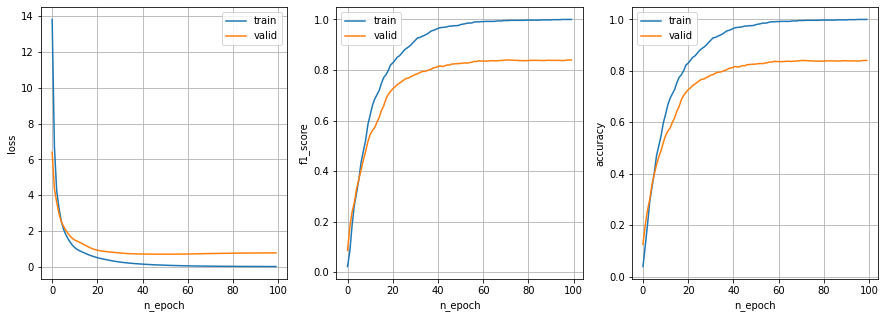

In [22]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(range(n_epoch), loss_train, label='train')
plt.plot(range(n_epoch), loss_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.subplot(1,3,2)
plt.plot(range(n_epoch), f1_train, label='train')
plt.plot(range(n_epoch), f1_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('f1_score')
plt.legend()
plt.grid()
plt.subplot(1,3,3)
plt.plot(range(n_epoch), acc_train, label='train')
plt.plot(range(n_epoch), acc_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid()

plt.savefig('./curves_ok.png', bbox_inches='tight')
plt.show()

In [23]:
input_dim = 28*28
out_dim = 10
hidden = 50

model = torch.nn.Sequential(
  torch.nn.Linear(input_dim, hidden),
  torch.nn.ReLU(),       
  torch.nn.Linear(hidden, hidden),
  torch.nn.ReLU(),
  torch.nn.Linear(hidden, out_dim)
)

optimizer = torch.optim.Adam(model.parameters())
criterion = torch.nn.CrossEntropyLoss()

In [24]:
#-- Número de épocas
n_epoch = 100

#-- Listas de evaluación entrenamiento
loss_train = []
f1_train = []
acc_train = []

#-- Listas de evaluación validación
loss_valid = []
f1_valid = []
acc_valid = []

#-- Entrenamineto de la ANN
for epoch in range(n_epoch):
  model.train()
  
  Xtr = X_train50.view(X_train50.size(0), -1)
  Y_pred = model(Xtr)

  loss = criterion(Y_pred,Y_train50)
  loss_train.append(loss.item())

  Y_pred = torch.argmax(Y_pred, 1)
  f1_train.append( f1_score(Y_train50,Y_pred, average='macro') )
  
  acc = sum(Y_train50 == Y_pred)/len(Y_pred)
  acc_train.append(acc)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  print( 'Epoch [{}/{}], loss: {}. f1:{} acc: {} '.format(epoch+1,n_epoch,loss_train[-1], f1_train[-1], acc_train[-1]) )

  model.eval()
  Xvl = X_valid.view(X_valid.size(0), -1)
  Y_pred = model(Xvl)  
  loss = criterion(Y_pred,Y_valid)
  loss_valid.append(loss.item())

  Y_pred = torch.argmax(Y_pred, 1)
  f1_valid.append( f1_score(Y_valid, Y_pred, average='macro') )

  acc = sum(Y_valid == Y_pred)/len(Y_pred)
  acc_valid.append(acc)

Epoch [1/100], loss: 18.42351531982422. f1:0.02156092711224856 acc: 0.09200000017881393 
Epoch [2/100], loss: 9.434531211853027. f1:0.03773715793719839 acc: 0.06566666811704636 
Epoch [3/100], loss: 6.871465682983398. f1:0.07709334709098739 acc: 0.11433333158493042 
Epoch [4/100], loss: 5.511519432067871. f1:0.10963875562609815 acc: 0.15433333814144135 
Epoch [5/100], loss: 4.367718696594238. f1:0.15612012864094904 acc: 0.1940000057220459 
Epoch [6/100], loss: 3.423823833465576. f1:0.19328812885907576 acc: 0.21766667068004608 
Epoch [7/100], loss: 2.76743745803833. f1:0.246590836499067 acc: 0.25966668128967285 
Epoch [8/100], loss: 2.3368008136749268. f1:0.2923167186595754 acc: 0.2939999997615814 
Epoch [9/100], loss: 2.0455212593078613. f1:0.34324765817847547 acc: 0.335999995470047 
Epoch [10/100], loss: 1.8109384775161743. f1:0.40410614350357293 acc: 0.40400001406669617 
Epoch [11/100], loss: 1.622808575630188. f1:0.44554979109404236 acc: 0.46666666865348816 
Epoch [12/100], loss: 1.

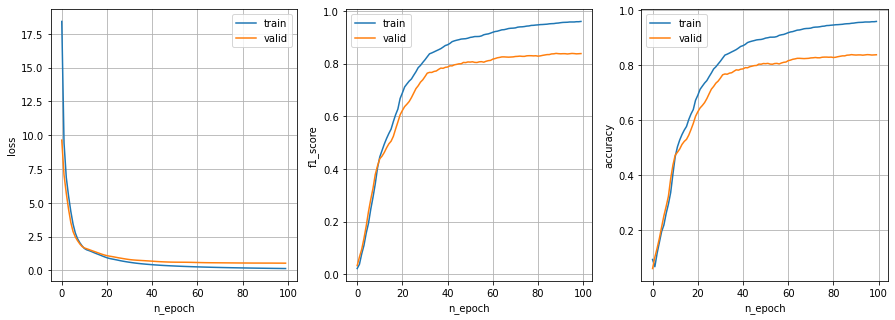

In [25]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(range(n_epoch), loss_train, label='train')
plt.plot(range(n_epoch), loss_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.subplot(1,3,2)
plt.plot(range(n_epoch), f1_train, label='train')
plt.plot(range(n_epoch), f1_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('f1_score')
plt.legend()
plt.grid()
plt.subplot(1,3,3)
plt.plot(range(n_epoch), acc_train, label='train')
plt.plot(range(n_epoch), acc_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid()

plt.savefig('./curves_ok.png', bbox_inches='tight')
plt.show()

In [26]:
input_dim = 28*28
out_dim = 10
hidden = 50

model = torch.nn.Sequential(
  torch.nn.Linear(input_dim, hidden),
  torch.nn.ReLU(),       
  torch.nn.Linear(hidden, hidden),
  torch.nn.ReLU(),
  torch.nn.Linear(hidden, out_dim)
)

optimizer = torch.optim.Adam(model.parameters())
criterion = torch.nn.CrossEntropyLoss()

In [27]:
#-- Número de épocas
n_epoch = 100

#-- Listas de evaluación entrenamiento
loss_train = []
f1_train = []
acc_train = []

#-- Listas de evaluación validación
loss_valid = []
f1_valid = []
acc_valid = []

#-- Entrenamineto de la ANN
for epoch in range(n_epoch):
  model.train()
  
  Xtr = X_train80.view(X_train80.size(0), -1)
  Y_pred = model(Xtr)

  loss = criterion(Y_pred,Y_train80)
  loss_train.append(loss.item())

  Y_pred = torch.argmax(Y_pred, 1)
  f1_train.append( f1_score(Y_train80,Y_pred, average='macro') )
  
  acc = sum(Y_train80 == Y_pred)/len(Y_pred)
  acc_train.append(acc)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  print( 'Epoch [{}/{}], loss: {}. f1:{} acc: {} '.format(epoch+1,n_epoch,loss_train[-1], f1_train[-1], acc_train[-1]) )

  model.eval()
  Xvl = X_valid.view(X_valid.size(0), -1)
  Y_pred = model(Xvl)  
  loss = criterion(Y_pred,Y_valid)
  loss_valid.append(loss.item())

  Y_pred = torch.argmax(Y_pred, 1)
  f1_valid.append( f1_score(Y_valid, Y_pred, average='macro') )

  acc = sum(Y_valid == Y_pred)/len(Y_pred)
  acc_valid.append(acc)

Epoch [1/100], loss: 15.086310386657715. f1:0.03430853941398008 acc: 0.10125000029802322 
Epoch [2/100], loss: 8.8151216506958. f1:0.11051091043062473 acc: 0.14395833015441895 
Epoch [3/100], loss: 6.397599697113037. f1:0.13316394650610458 acc: 0.16625000536441803 
Epoch [4/100], loss: 4.167079448699951. f1:0.21107714260649119 acc: 0.2160416692495346 
Epoch [5/100], loss: 3.171940326690674. f1:0.2878818598175391 acc: 0.2931250035762787 
Epoch [6/100], loss: 2.69290828704834. f1:0.3488690982600121 acc: 0.3616666793823242 
Epoch [7/100], loss: 2.2457900047302246. f1:0.44197595668822653 acc: 0.45270833373069763 
Epoch [8/100], loss: 1.8316497802734375. f1:0.5122263466416246 acc: 0.5197916626930237 
Epoch [9/100], loss: 1.5213584899902344. f1:0.5773598255553075 acc: 0.5787500143051147 
Epoch [10/100], loss: 1.3495632410049438. f1:0.6174020911339841 acc: 0.6158333420753479 
Epoch [11/100], loss: 1.267875075340271. f1:0.6453003269126448 acc: 0.6441666483879089 
Epoch [12/100], loss: 1.194652

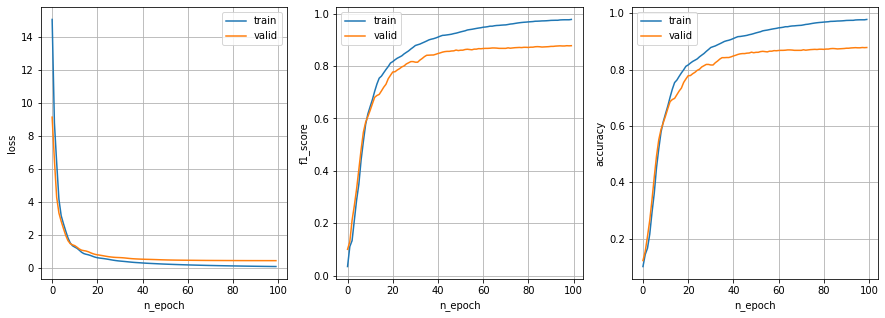

In [28]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(range(n_epoch), loss_train, label='train')
plt.plot(range(n_epoch), loss_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.subplot(1,3,2)
plt.plot(range(n_epoch), f1_train, label='train')
plt.plot(range(n_epoch), f1_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('f1_score')
plt.legend()
plt.grid()
plt.subplot(1,3,3)
plt.plot(range(n_epoch), acc_train, label='train')
plt.plot(range(n_epoch), acc_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid()

plt.savefig('./curves_ok.png', bbox_inches='tight')
plt.show()

Es realmente importante que el grupo de datos de entrenamiento sea bastante grande para que el modelo sea capaz de aprender de manera real, ya que con pocos datos arroja datos irreales y la precisión y el f1 tienden a 1 muy rapido cuando no hay datos suficientes, por otra parte como podemos evidenciar en el código, de 10 20 y 80% de los datos la curva de valid se acerca más a la de entrenamiento lo cual nos dice que mientras más datos el modelo esta aprendiendo mejor.

In [32]:

X_testlala10=[]
X_testlala20=[]
X_testlala50=[]
X_testlala80=[]
X_test10=[]
X_test20=[]
X_test50=[]
X_test80=[]
Y_test10=[]
Y_test20=[]
Y_test50=[]
Y_test80=[]
for i in range(99):
  X_testlala10.append(random.randrange(1, 992, 1))
for i in range(198):
  X_testlala20.append(random.randrange(1, 992, 1))
for i in range(496):
  X_testlala50.append(random.randrange(1, 992, 1))
for i in range(793):
  X_testlala80.append(random.randrange(1, 992, 1))

for i in range(len(X_testlala10)):
  X_test10.append(X_test[i])
  Y_test10.append(Y_test[i])
for i in range(len(X_testlala20)):
  X_test20.append(X_test[i])
  Y_test20.append(Y_test[i])
for i in range(len(X_testlala50)):
  X_test50.append(X_test[i])
  Y_test50.append(Y_test[i])
for i in range(len(X_testlala80)):
  X_test80.append(X_test[i])
  Y_test80.append(Y_test[i])




In [34]:
X_test10 = Variable(torch.from_numpy(np.array(X_test10))).float()
Y_test10 = Variable(torch.from_numpy(np.array(Y_test10))).long()
X_test20 = Variable(torch.from_numpy(np.array(X_test20))).float()
Y_test20 = Variable(torch.from_numpy(np.array(Y_test20))).long()
X_test50 = Variable(torch.from_numpy(np.array(X_test50))).float()
Y_test50 = Variable(torch.from_numpy(np.array(Y_test50))).long()
X_test80 = Variable(torch.from_numpy(np.array(X_test80))).float()
Y_test80 = Variable(torch.from_numpy(np.array(Y_train80))).long()
len(X_test10),len(X_test20),len(X_test50),len(X_test80)

(99, 198, 496, 793)

In [37]:
model.eval()

Xts = X_test.view(X_test.size(0), -1)
Y_pred = model(Xts)  
loss = criterion(Y_pred,Y_test)

Y_pred = torch.argmax(Y_pred, 1)
f1 = f1_score(Y_test, Y_pred, average='macro')

acc = sum(Y_test == Y_pred)/len(Y_pred)

print('loss: {}, f1: {}, acc: {}'.format(loss.item(), f1, acc))

loss: 0.42001184821128845, f1: 0.888570908389424, acc: 0.8891128897666931


In [38]:
model.eval()

Xts = X_test10.view(X_test10.size(0), -1)
Y_pred = model(Xts)  
loss = criterion(Y_pred,Y_test10)

Y_pred = torch.argmax(Y_pred, 1)
f1 = f1_score(Y_test10, Y_pred, average='macro')

acc = sum(Y_test10 == Y_pred)/len(Y_pred)

print('loss: {}, f1: {}, acc: {}'.format(loss.item(), f1, acc))

loss: 0.2603748142719269, f1: 0.9211736411736412, acc: 0.9292929172515869


In [39]:
model.eval()

Xts = X_test20.view(X_test20.size(0), -1)
Y_pred = model(Xts)  
loss = criterion(Y_pred,Y_test20)

Y_pred = torch.argmax(Y_pred, 1)
f1 = f1_score(Y_test20, Y_pred, average='macro')

acc = sum(Y_test20 == Y_pred)/len(Y_pred)

print('loss: {}, f1: {}, acc: {}'.format(loss.item(), f1, acc))

loss: 0.29838138818740845, f1: 0.9124239912117, acc: 0.9141414165496826


In [40]:
model.eval()

Xts = X_test50.view(X_test50.size(0), -1)
Y_pred = model(Xts)  
loss = criterion(Y_pred,Y_test50)

Y_pred = torch.argmax(Y_pred, 1)
f1 = f1_score(Y_test50, Y_pred, average='macro')

acc = sum(Y_test50 == Y_pred)/len(Y_pred)

print('loss: {}, f1: {}, acc: {}'.format(loss.item(), f1, acc))

loss: 0.4252528250217438, f1: 0.8873180775411835, acc: 0.8891128897666931


El tamaño del conjunto de testeo de por si suele ser el 10% de la muestra de datos así que su tamaño como tal es importante para verificar que tan bien aprendió nuestro modelo por eso es importante que igual sea un valor significativo, sin embargo en este caso que el conjunto de datos es de aproximadamente 1000 datos que no son muchos el tomar el 50 o el 80% no hace mucha diferencia, ya que si analizamos el loss que se obtuvo entre valores de 10 y 20% si cambia significativamente, pero ya en el 50% es un valor bastante cercano al que tenemos si utilizamos todo el conjunto de datos del testeo, así que siempre debe haber un valor mínimo que según la información que tenemos no debería bajar del 5% del total de datos totales, pero podemos "desperdiciar" un mayor porcentaje que si hablaramos de los datos de training.